In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,ShuffleSplit,cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix,f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [2]:
# Load dataset
df = pd.read_csv('Employee_data.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted
0,80589,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.shape

(54808, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPI_>80%              54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


In [6]:
# check missing values
df.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPI_>80%                False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [7]:
print('The number of missing value data in the "education" column :',df['education'].isnull().sum())
print('The percentage of number of missing value data in the "education" column :',(df['education'].isnull().sum())*100/df.shape[0],'%')

The number of missing value data in the "education" column : 2409
The percentage of number of missing value data in the "education" column : 4.395343745438622 %


In [8]:
print('The number of missing value data in the "pendidikan" column :',df['previous_year_rating'].isnull().sum())
print('The percentage of number of missing value data in the "pendidikan" column :',(df['previous_year_rating'].isnull().sum())*100/df.shape[0],'%')

The number of missing value data in the "pendidikan" column : 4124
The percentage of number of missing value data in the "pendidikan" column : 7.524448985549554 %


Because the missing value is relatively small (< 10%), we don't need to throw it away. We try to do imputation with the average value or mode of each column that has a missing value.

In [9]:
# Fill in the missing value in the education column with the value that appears the most, namely Bachelor's

df['education']=df['education'].fillna("Bachelor's")
df['education'].count()

54808

In [10]:
# Fill in the missing value in the 'previous_year_rating' column with the average value or mode

df['previous_year_rating']=df['previous_year_rating'].fillna(3.0)
df['previous_year_rating'].count()

54808

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPI_>80%              54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


In [12]:
# Check duplicates
df.duplicated().any()

False

In [13]:
# Check outliers
df_num = df[["no_of_trainings","age","length_of_service","avg_training_score"]]

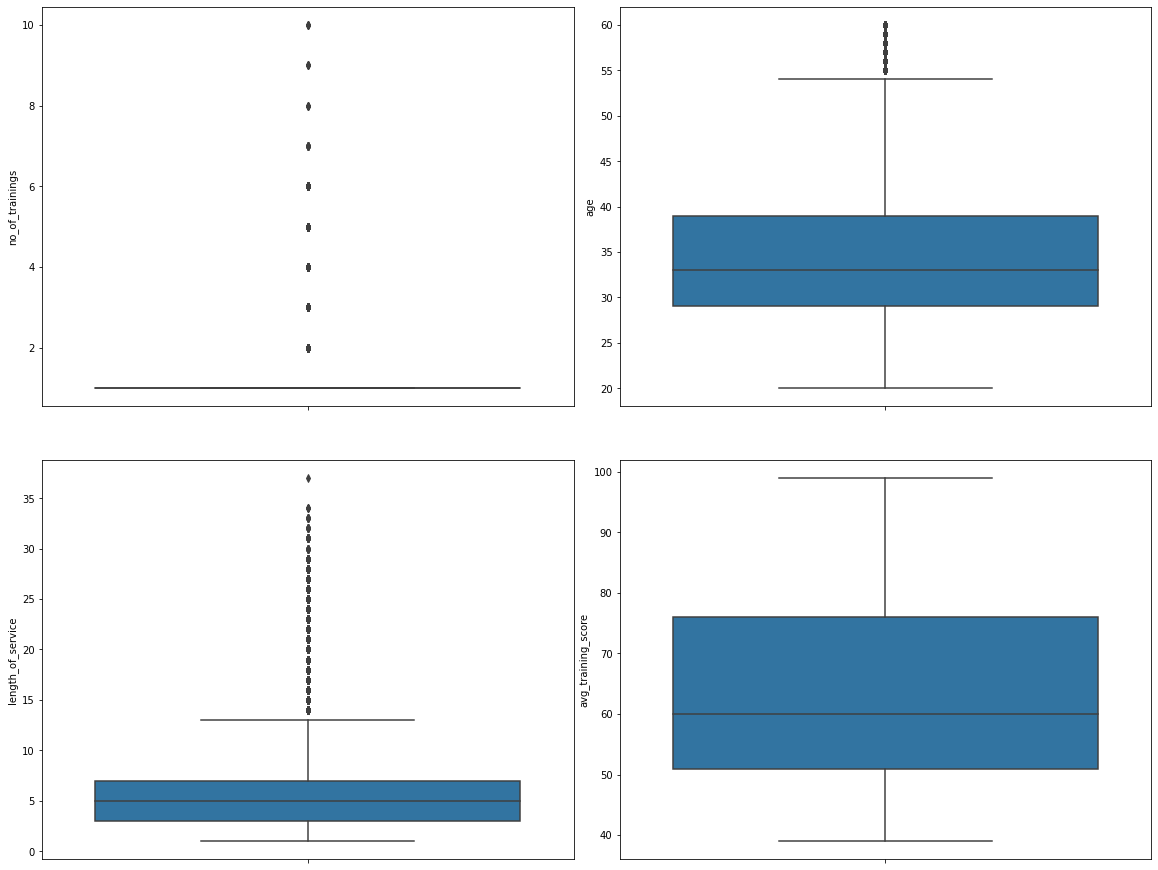

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))
index = 0
axs = axs.flatten()
for k,v in df_num.items():
    sns.boxplot(y=k, data=df_num, ax=axs[index], orient="H")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [15]:
display(df.describe().loc[["mean","50%","std"]].loc[:,["no_of_trainings","age",
                                                       "length_of_service","avg_training_score"]])

,no_of_trainings,age,length_of_service,avg_training_score
mean,1.253011,34.803915,5.865512,63.386750
50%,1.000000,33.000000,5.000000,60.000000
std,0.609264,7.660169,4.265094,13.371559


=> It looks like we have outlier in 'length_of_service' feature. We also have outlier in 'age' feature, but it looks like natural outlier. We will handle outliers in data preprocessing process.

In [ ]:
# EXPLORATORY DATA ANALYSIS

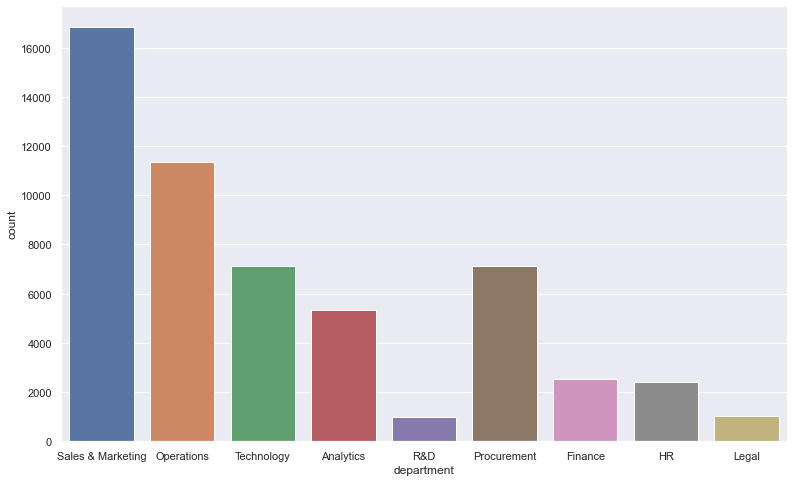

In [16]:
# Department feature
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='department',data=df)

=> It can be seen from the graph above that the Sales & marketing, Operations, and Procurement dominate the data in this department feature.

<Figure size 1440x576 with 0 Axes>

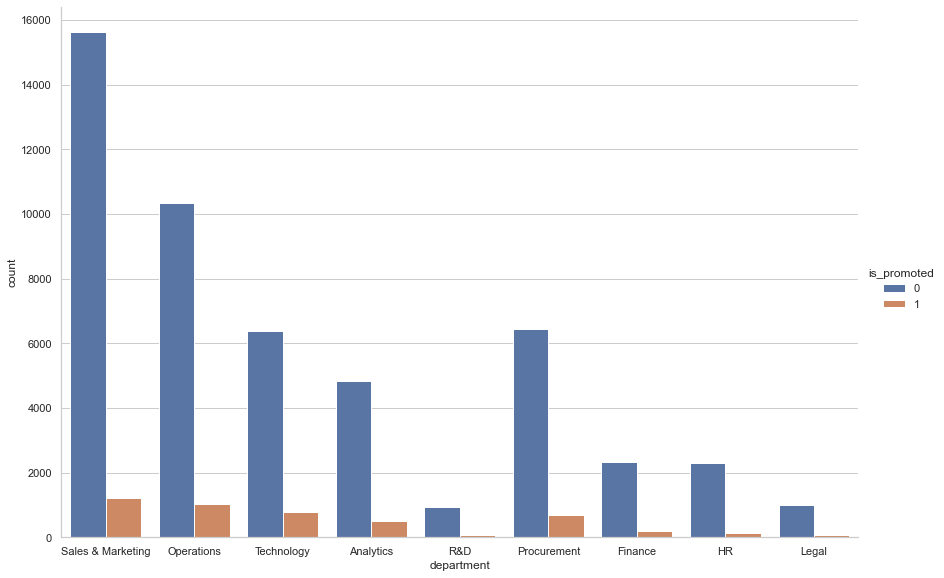

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='department',hue='is_promoted',data=df,kind="count",height=8, aspect=1.5)

From the graph above, it can be seen that employees from the Sales & marketing, operations, and Technology departments were promoted the most.

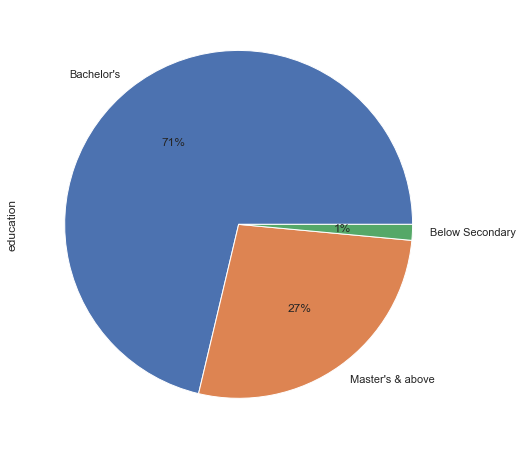

In [14]:
# Education feature
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['education'].value_counts().plot(kind="pie", autopct="%.0f%%")
plt.show()

<Figure size 1440x576 with 0 Axes>

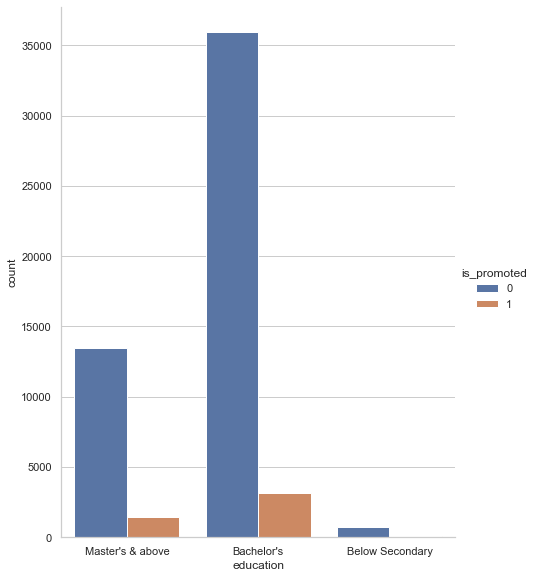

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='education',hue='is_promoted',data=df,kind="count",height=8, aspect=0.8)

=> employees with bachelor's and master's educational backgrounds are the most promoted.

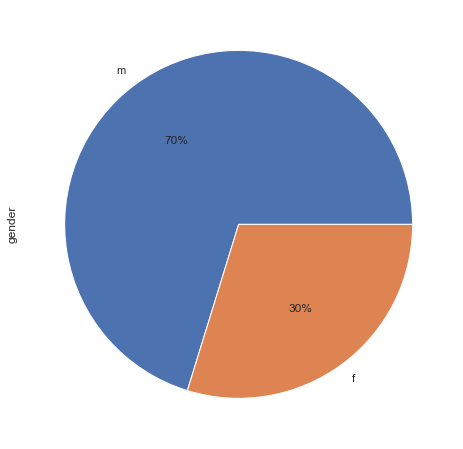

In [15]:
# Gender feature
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['gender'].value_counts().plot(kind="pie", autopct="%.0f%%")
plt.show()

=> the data is dominated by Male employees

<Figure size 1440x576 with 0 Axes>

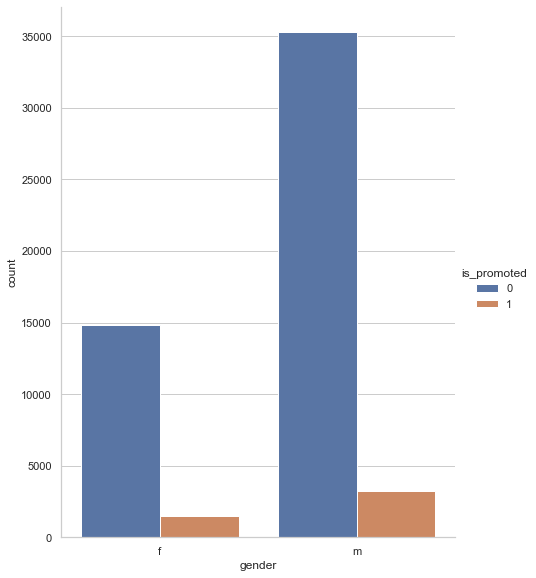

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='gender',hue='is_promoted',data=df,kind="count",height=8, aspect=0.8)

=> male employees are also promoted more than female (in number).

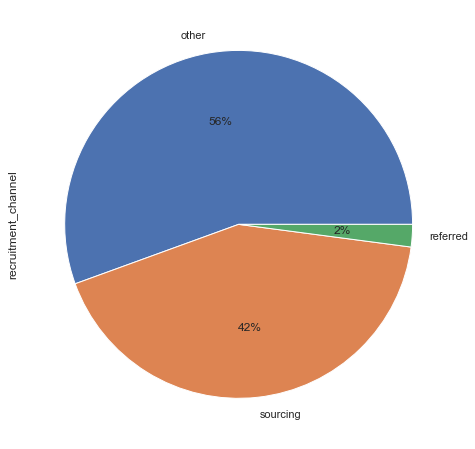

In [17]:
# Recruitment feature
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['recruitment_channel'].value_counts().plot(kind="pie", autopct="%.0f%%")
plt.show()

=> most of the employee recruitment paths are "other" or not clearly described. The second position is mostly occupied by "sourcing".

<Figure size 1440x576 with 0 Axes>

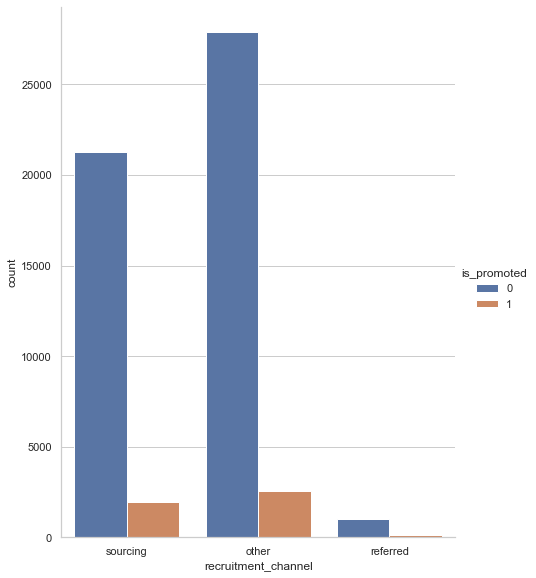

In [18]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='recruitment_channel',hue='is_promoted',data=df,kind="count",height=8, aspect=0.8)

=> employees with "other" recruitment processes or not clearly described occupy the most positions in the order of promotion. While employees with "referred" recruitment paths are almost non-existent (slightly) are promoted.

<Figure size 1440x576 with 0 Axes>

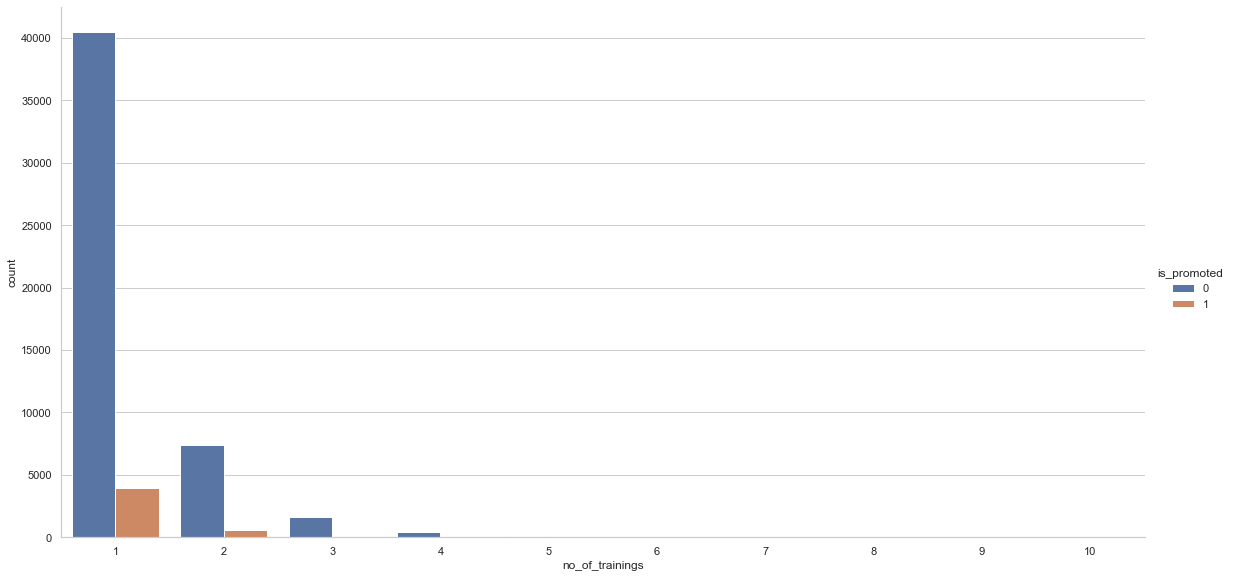

In [19]:
# Number of training
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='no_of_trainings',hue='is_promoted',data=df,kind="count",height=8, aspect=2)

=> the employees with the least amount of training (i.e. 1) are actually promoted the most.

<Figure size 1440x576 with 0 Axes>

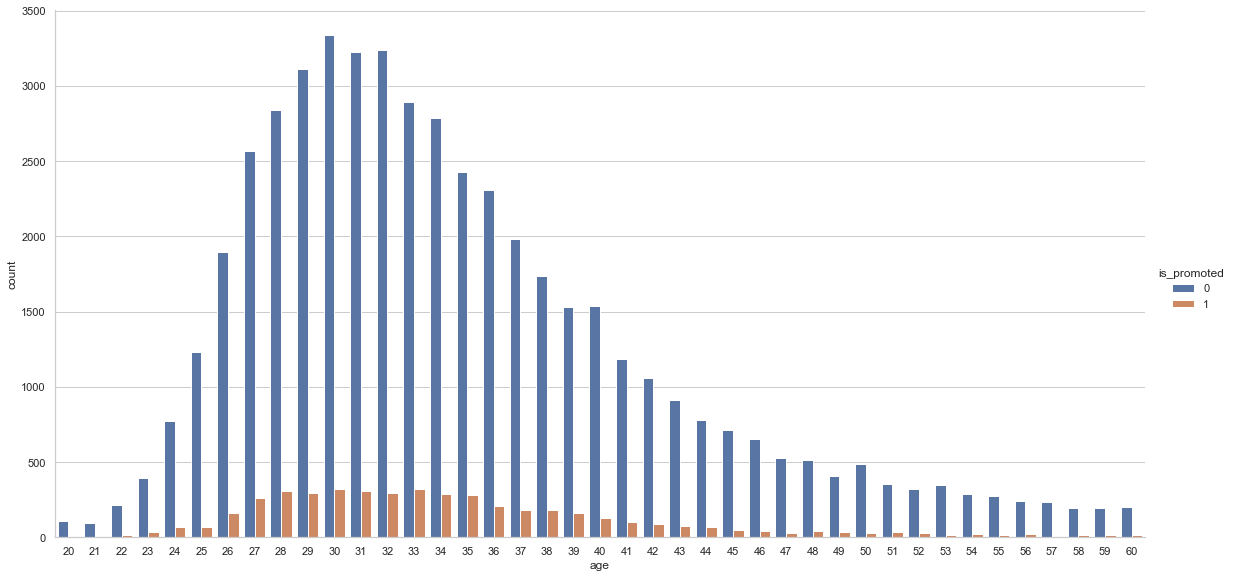

In [20]:
# Age
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='age',hue='is_promoted',data=df,kind="count",height=8, aspect=2)

=> employees have age from 27-35 years are the most promoted employees.

<Figure size 1440x576 with 0 Axes>

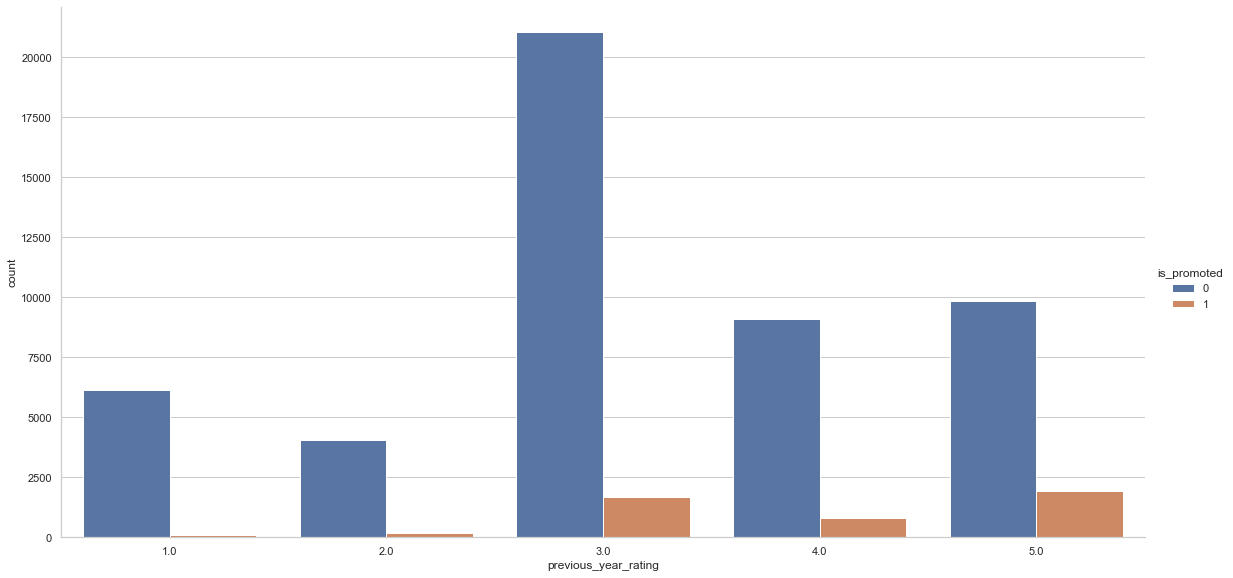

In [21]:
# previous_year_rating
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='previous_year_rating',hue='is_promoted',data=df,kind="count",height=8, aspect=2)

=> employees with a rating of 5 are the most promoted employees.

<Figure size 1440x576 with 0 Axes>

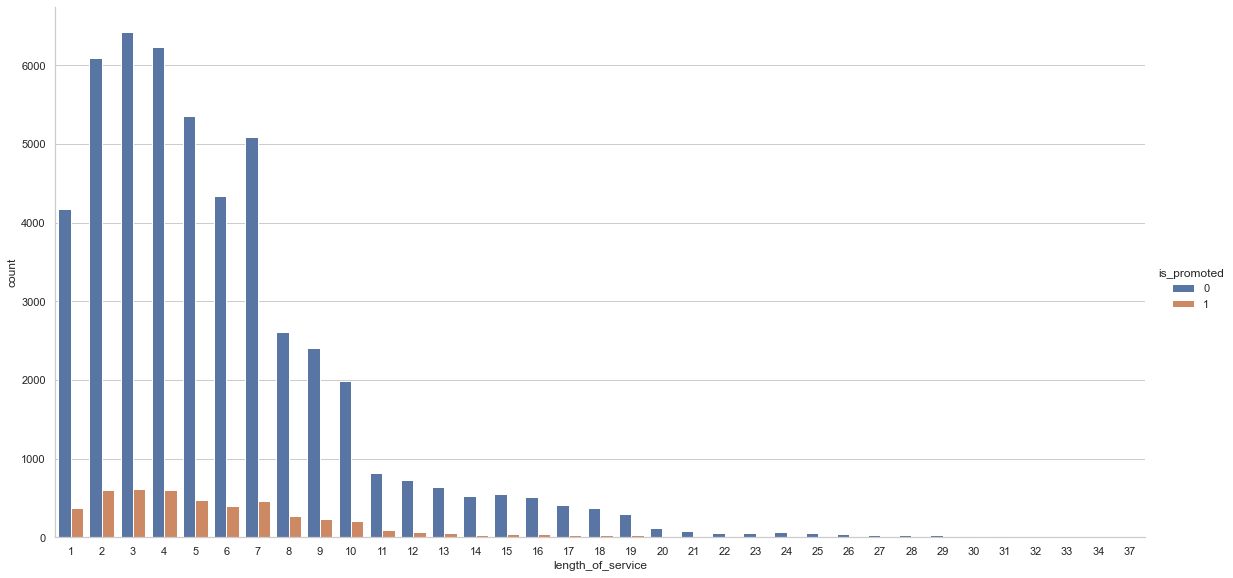

In [22]:
# length_of_service or working period
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='length_of_service',hue='is_promoted',data=df,kind="count",height=8, aspect=2)

<Figure size 1440x576 with 0 Axes>

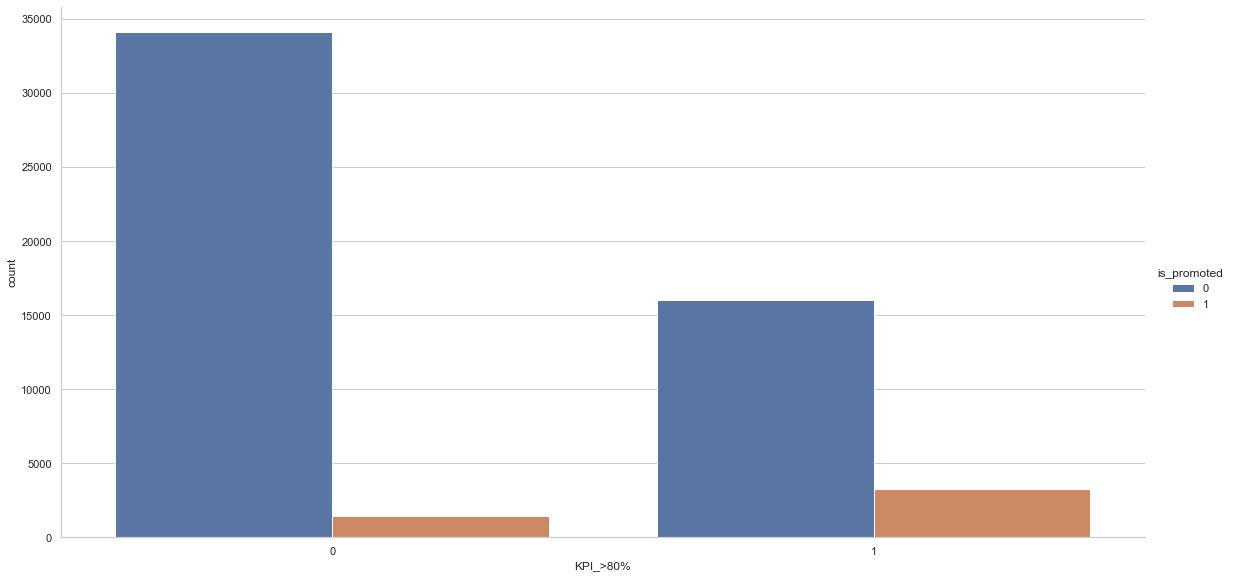

In [18]:
# KPIs 
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='KPI_>80%',hue='is_promoted',data=df,kind="count",height=8, aspect=2)

=> employees with 2-4 years of service are the most promoted employees.

<Figure size 1440x576 with 0 Axes>

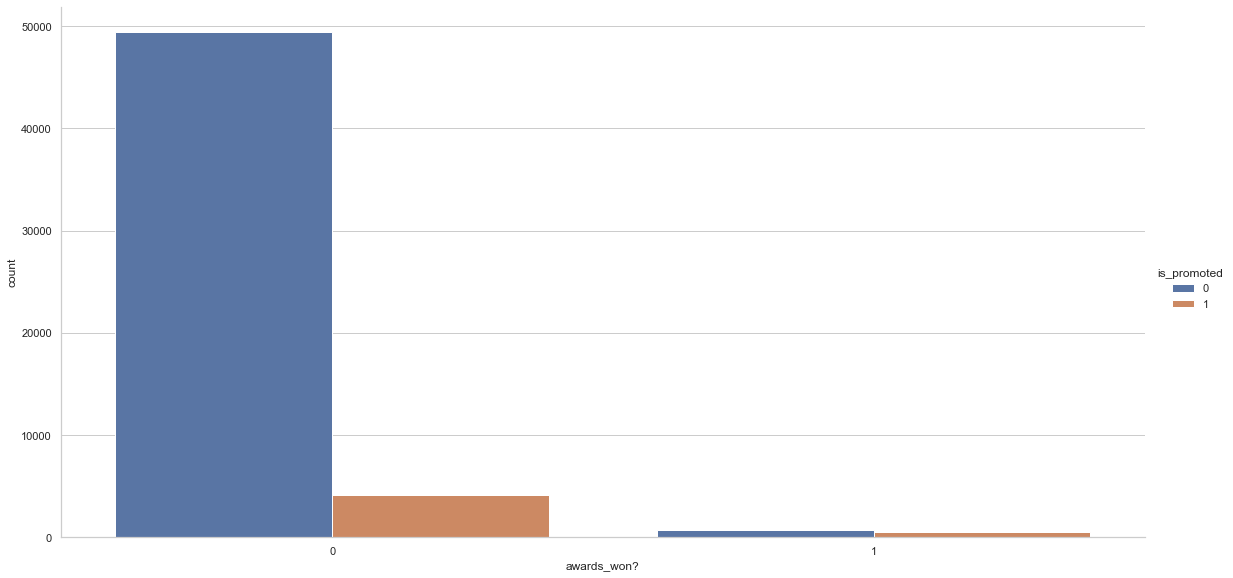

In [27]:
# Awards awards_won?
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='awards_won?',hue='is_promoted',data=df,kind="count",height=8, aspect=2)

=> employees who do not have awards are the most promoted because the number of employees who do not have awards is much higher than employees who have awards.

<Figure size 1440x576 with 0 Axes>

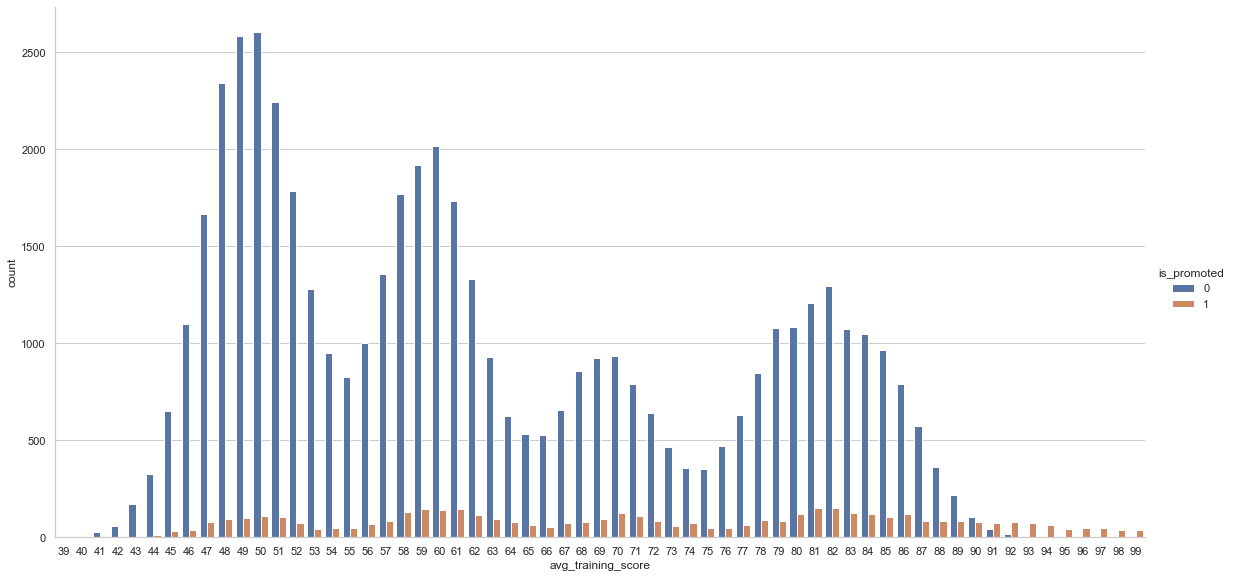

In [26]:
# avg_training_score
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='avg_training_score',hue='is_promoted',data=df,kind="count",height=8, aspect=2)

=> approximately employees with average training scores in the range 59-62 and 80-85 were the most promoted (although the difference may be small).

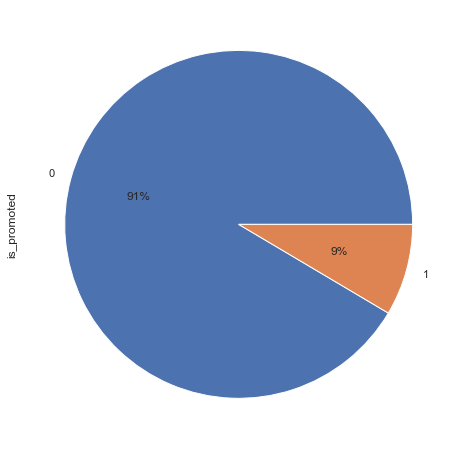

In [28]:
# promoted
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['is_promoted'].value_counts().plot(kind="pie", autopct="%.0f%%")
plt.show()

=> our target feature data between positive and negative is not balanced. We have more negative data.

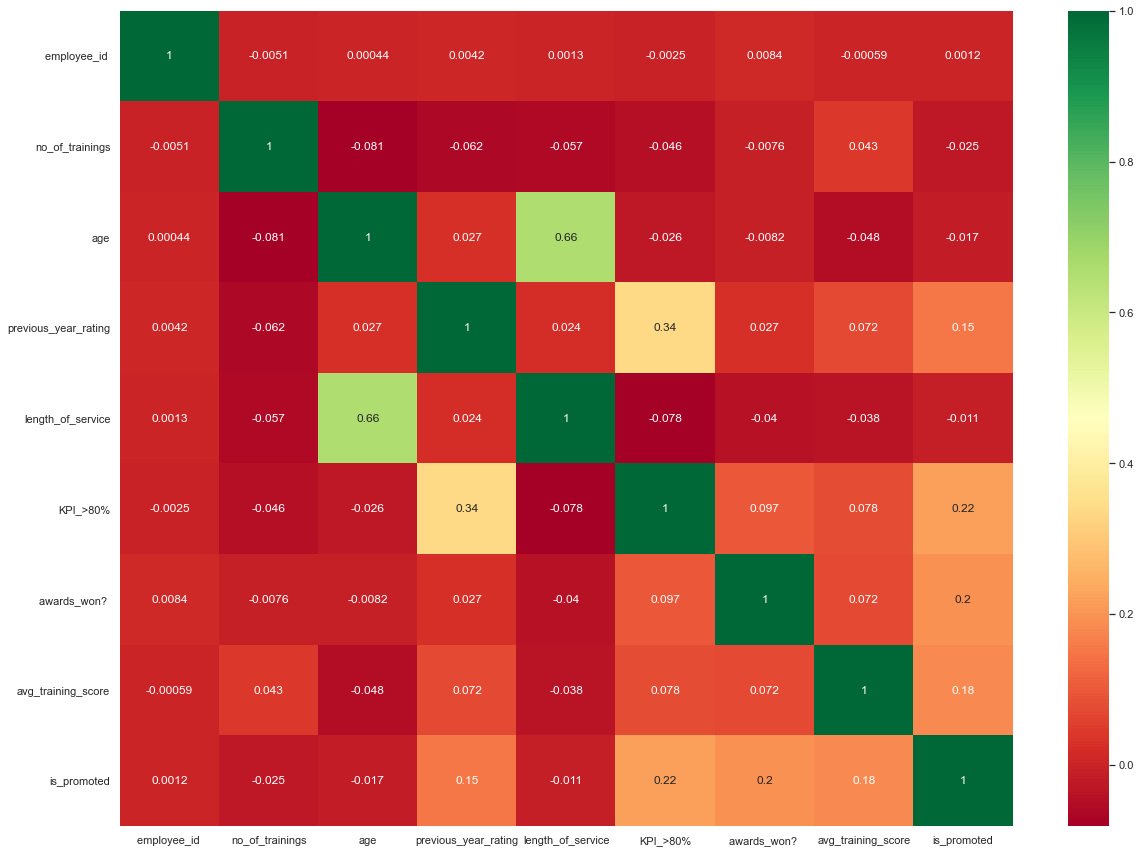

In [19]:
# Check correlation of features in data
plt.figure(figsize=(20,15))
# plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

=> there is no significant and significant correlation of each feature. It means that we don't have multicollinearity problem.

In [ ]:
# DATA PREPROCESSING

In [20]:
# drop some columns not needed
new_df = df.copy()

In [21]:
new_df.shape

(54808, 14)

In [23]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted
0,80589,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [27]:
df = df.drop(['employee_id ','region'], axis=1)

In [28]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [29]:
# remove outliers
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [30]:
df[df['no_of_trainings']==10]

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted
6207,Procurement,Master's & above,m,other,10,55,3.0,12,0,0,70,0
30936,Procurement,Bachelor's,m,sourcing,10,28,3.0,2,0,0,71,0
32870,Procurement,Bachelor's,m,sourcing,10,36,1.0,10,0,0,66,0
34496,Procurement,Bachelor's,m,other,10,60,3.0,3,0,0,69,0
44897,Sales & Marketing,Master's & above,f,other,10,42,3.0,13,0,0,49,0


In [31]:
df['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
9         5
10        5
Name: no_of_trainings, dtype: int64

Looks like the value 10 in the training_number column still makes sense. It doesn't get thrown away. Then, the working period column will then be checked for possible outliers.

In [32]:
df[df['length_of_service']==37]

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted
31071,Sales & Marketing,Bachelor's,m,sourcing,2,60,5.0,37,0,0,48,0


In [33]:
# IQR Method
Q12 = df['length_of_service'].quantile(0.25)
Q32 = df['length_of_service'].quantile(0.75)
IQR2 = Q32-Q12

In [34]:
Q32+(1.5*IQR2)

13.0

In [35]:
df[df['length_of_service']>(Q32+(1.5*IQR2))]

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted
13,Technology,Master's & above,m,other,2,39,3.0,16,0,0,80,0
42,HR,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0
60,Sales & Marketing,Master's & above,m,other,1,50,4.0,17,1,0,47,1
74,Sales & Marketing,Bachelor's,m,other,1,50,3.0,14,0,0,52,0
99,Finance,Master's & above,m,other,1,60,5.0,17,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54691,Analytics,Master's & above,m,sourcing,1,47,5.0,19,0,0,86,0
54695,Operations,Bachelor's,f,other,2,52,5.0,18,1,0,56,1
54697,Sales & Marketing,Bachelor's,m,sourcing,1,47,5.0,15,0,0,50,0
54754,Technology,Bachelor's,f,other,1,42,3.0,14,0,0,79,0


It can be seen that data with tenure of more than 14 years includes outliers based on the IQR formula. However here I am discarding only data with values 20 years and over.

In [36]:
df['length_of_service'].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

In [37]:
df= df[~((df['length_of_service']>21))]

In [38]:
df.shape

(54368, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54368 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54368 non-null  object 
 1   education             54368 non-null  object 
 2   gender                54368 non-null  object 
 3   recruitment_channel   54368 non-null  object 
 4   no_of_trainings       54368 non-null  int64  
 5   age                   54368 non-null  int64  
 6   previous_year_rating  54368 non-null  float64
 7   length_of_service     54368 non-null  int64  
 8   KPI_>80%              54368 non-null  int64  
 9   awards_won?           54368 non-null  int64  
 10  avg_training_score    54368 non-null  int64  
 11  is_promoted           54368 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 4.6+ MB


In [40]:
# Categorical encoding
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [55]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)

In [42]:
df_onehot.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel _other,recruitment_channel _referred,recruitment_channel _sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,1,1,0,0,0,1,1,0,0


In [55]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54368 entries, 0 to 54807
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54368 non-null  int64  
 1   age                           54368 non-null  int64  
 2   previous_year_rating          54368 non-null  float64
 3   length_of_service             54368 non-null  int64  
 4   awards_won?                   54368 non-null  int64  
 5   avg_training_score            54368 non-null  int64  
 6   is_promoted                   54368 non-null  int64  
 7   department_Analytics          54368 non-null  uint8  
 8   department_Finance            54368 non-null  uint8  
 9   department_HR                 54368 non-null  uint8  
 10  department_Legal              54368 non-null  uint8  
 11  department_Operations         54368 non-null  uint8  
 12  department_Procurement        54368 non-null  uint8  
 13  d

In [46]:
# Features selection
from sklearn.feature_selection import chi2

X_chi = df_onehot.drop(['no_of_trainings','age','previous_year_rating','length_of_service','awards_won? ','avg_training_score','is_promoted'],axis=1)
y_chi = df_onehot['is_promoted']

In [47]:
X_chi.columns

Index(['KPI_>80%', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'gender_f', 'gender_m',
       'recruitment_channel _other', 'recruitment_channel _referred',
       'recruitment_channel _sourcing'],
      dtype='object')

In [48]:
chi_score = chi2(X_chi,y_chi)
chi_score

(array([1.70621803e+03, 6.51656115e+00, 4.58788250e-01, 2.61366426e+01,
        1.55651234e+01, 3.50749166e+00, 1.14844114e+01, 3.41795988e+00,
        3.61041014e+01, 4.71379135e+01, 1.27202848e+01, 4.93344632e-02,
        3.41930981e+01, 4.79730661e+00, 2.02865428e+00, 5.75789494e-01,
        1.85302148e+01, 7.90579383e-03]),
 array([0.00000000e+00, 1.06874461e-02, 4.98190831e-01, 3.18089920e-07,
        7.97114603e-05, 6.10918842e-02, 7.01823505e-04, 6.44906650e-02,
        1.87052740e-09, 6.61633950e-12, 3.61710674e-04, 8.24225430e-01,
        4.99056393e-09, 2.85042652e-02, 1.54357231e-01, 4.47967454e-01,
        1.67232111e-05, 9.29149835e-01]))

In [49]:
p_values = pd.Series(chi_score[1],index = X_chi.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

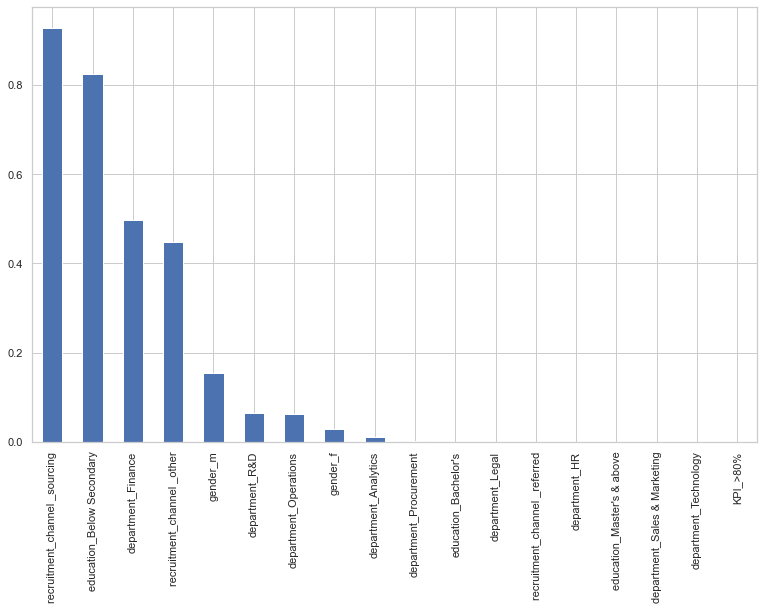

In [50]:
p_values.plot.bar()

In [51]:
df_onehot.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPI_>80%', 'awards_won? ', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above', 'gender_f',
       'gender_m', 'recruitment_channel _other',
       'recruitment_channel _referred', 'recruitment_channel _sourcing'],
      dtype='object')

In [59]:
df_onehot = df_onehot.drop(['recruitment_channel _sourcing', 'education_Below Secondary', 'recruitment_channel _other',
                           'department_Finance', 'gender_m', 'gender_f', 'department_R&D',
                            'department_Operations'],axis=1)

In [60]:
df_onehot.shape

(54368, 17)

In [61]:
# Dimensional reduction with PCA
df2 = df_onehot.copy()

In [62]:
x_pc = df2.drop('is_promoted',axis = 1).values
y_pc = df2['is_promoted'].values

In [63]:
x_pc = StandardScaler().fit_transform(x_pc)
x_pc = pd.DataFrame(x_pc)

In [64]:
x_pc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.415770,0.047846,1.396314,0.591583,1.354154,-0.154592,-1.075636,-0.329923,-0.214901,-0.139375,-0.386089,1.501401,-0.386215,-1.582259,1.641717,-0.146347
1,-0.415770,-0.621422,1.396314,-0.439478,-0.738468,-0.154592,-0.253504,-0.329923,-0.214901,-0.139375,-0.386089,-0.666045,-0.386215,0.632008,-0.609118,-0.146347
2,-0.415770,-0.086007,-0.250607,0.333818,-0.738468,-0.154592,-1.000897,-0.329923,-0.214901,-0.139375,-0.386089,1.501401,-0.386215,0.632008,-0.609118,-0.146347
3,1.223313,0.583261,-1.897527,1.107113,-0.738468,-0.154592,-1.000897,-0.329923,-0.214901,-0.139375,-0.386089,1.501401,-0.386215,0.632008,-0.609118,-0.146347
4,-0.415770,1.386384,-0.250607,-0.955009,-0.738468,-0.154592,0.718106,-0.329923,-0.214901,-0.139375,-0.386089,-0.666045,2.589232,0.632008,-0.609118,-0.146347


In [65]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_pc)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.046368,-1.261063,1.898122,-0.830997,0.137860,1.237734,0.502672,0.141423,-0.576201,-0.741584,-0.090731,-0.074814,-0.600919,-0.528361,-0.062946,-0.038989
1,-1.035141,-0.016666,0.614476,0.284289,-0.078262,-0.179131,-0.244883,-0.004803,-0.225254,-0.472038,-0.120594,-1.541189,0.014159,0.863559,-0.061558,-0.045279
2,-0.626944,-1.957021,-0.455537,0.550201,-0.135992,0.438163,0.025755,0.014992,0.042244,-0.172525,-0.460443,-0.322331,-0.203955,-0.329970,0.040101,0.012700
3,-0.190422,-2.236537,-1.934961,0.765824,0.241215,0.492565,0.280476,-0.293916,0.114801,0.720617,0.658888,0.919696,-0.270796,-0.156257,0.077804,0.042151
4,-0.309404,1.220111,-1.355539,0.610229,-1.991564,-0.324733,0.498261,0.209665,0.275190,-0.837840,0.209443,-0.291958,1.756468,-0.248108,-0.453439,0.019951


In [66]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15286885, 0.13793217, 0.08729821, 0.07567632, 0.07441279,
       0.07068346, 0.06834548, 0.064618  , 0.06166942, 0.05825755,
       0.05654437, 0.04038621, 0.02216896, 0.02095069, 0.00606835,
       0.00211919])

In [68]:
x_pca['is_promoted']=y_pc
x_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','is_promoted']
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,is_promoted
0,2.046368,-1.261063,1.898122,-0.830997,0.137860,1.237734,0.502672,0.141423,-0.576201,-0.741584,-0.090731,-0.074814,-0.600919,-0.528361,-0.062946,-0.038989,0
1,-1.035141,-0.016666,0.614476,0.284289,-0.078262,-0.179131,-0.244883,-0.004803,-0.225254,-0.472038,-0.120594,-1.541189,0.014159,0.863559,-0.061558,-0.045279,0
2,-0.626944,-1.957021,-0.455537,0.550201,-0.135992,0.438163,0.025755,0.014992,0.042244,-0.172525,-0.460443,-0.322331,-0.203955,-0.329970,0.040101,0.012700,0
3,-0.190422,-2.236537,-1.934961,0.765824,0.241215,0.492565,0.280476,-0.293916,0.114801,0.720617,0.658888,0.919696,-0.270796,-0.156257,0.077804,0.042151,0
4,-0.309404,1.220111,-1.355539,0.610229,-1.991564,-0.324733,0.498261,0.209665,0.275190,-0.837840,0.209443,-0.291958,1.756468,-0.248108,-0.453439,0.019951,0


In [69]:
pca2 = PCA(n_components=8)

In [70]:
Xp = df2.drop('is_promoted',axis = 1).values
yp = df2['is_promoted'].values

In [71]:
pca2.fit(Xp)
# apply transform to dataset
Xp = pca2.transform(Xp)

In [72]:
Xp.shape

(54368, 8)

In [73]:
# Split into training and test data
scaler = StandardScaler()
X = df_onehot.drop("is_promoted",axis=1)
y = df_onehot["is_promoted"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size = 0.2, stratify=yp)

In [75]:
# Scaling
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# MACHINE LEARNING MODELS

In [76]:
# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
pred_knn = model_knn.predict(X_test)
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9945
           1       0.71      0.23      0.35       929

    accuracy                           0.93     10874
   macro avg       0.82      0.61      0.65     10874
weighted avg       0.91      0.93      0.91     10874



In [80]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[0,1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))
    
Confusion_Matrix(y_test,pred_knn)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      9945
           1       0.71      0.23      0.35       929

    accuracy                           0.93     10874
   macro avg       0.82      0.61      0.65     10874
weighted avg       0.91      0.93      0.91     10874



TN - True Negative 215
FP - False Positive 714
FN - False Negative 88
TP - True Positive 9857
Accuracy Rate: 0.9262460915946293
Misclassification Rate: 0.0737539084053706
F1-Score: 0.6549672665996511
ROC-AUC 0.611291489629994


In [81]:
# Naive-Bayes
model_gaussian = GaussianNB()
model_gaussian.fit(X_train,y_train)

GaussianNB()

In [82]:
pred_gauss = model_gaussian.predict(X_test)
print(classification_report(y_test,pred_gauss))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9945
           1       0.72      0.07      0.13       929

    accuracy                           0.92     10874
   macro avg       0.82      0.53      0.54     10874
weighted avg       0.90      0.92      0.89     10874



In [83]:
Confusion_Matrix(y_test,pred_gauss)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9945
           1       0.72      0.07      0.13       929

    accuracy                           0.92     10874
   macro avg       0.82      0.53      0.54     10874
weighted avg       0.90      0.92      0.89     10874



TN - True Negative 65
FP - False Positive 864
FN - False Negative 25
TP - True Positive 9920
Accuracy Rate: 0.918245355894795
Misclassification Rate: 0.08175464410520508
F1-Score: 0.5423446389883638
ROC-AUC 0.5337269405844091


In [84]:
# Logistic regression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [85]:
pred_LR = model_LR.predict(X_test)
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9945
           1       0.85      0.02      0.05       929

    accuracy                           0.92     10874
   macro avg       0.88      0.51      0.50     10874
weighted avg       0.91      0.92      0.88     10874



In [86]:
Confusion_Matrix(y_test,pred_LR)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9945
           1       0.85      0.02      0.05       929

    accuracy                           0.92     10874
   macro avg       0.88      0.51      0.50     10874
weighted avg       0.91      0.92      0.88     10874



TN - True Negative 22
FP - False Positive 907
FN - False Negative 4
TP - True Positive 9941
Accuracy Rate: 0.9162221813500092
Misclassification Rate: 0.0837778186499908
F1-Score: 0.5011302384033289
ROC-AUC 0.5116395828293504


In [87]:
# Random forest
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
pred_forest = model_forest.predict(X_test)
print(classification_report(y_test,pred_forest))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      9945
           1       0.72      0.34      0.46       929

    accuracy                           0.93     10874
   macro avg       0.83      0.66      0.71     10874
weighted avg       0.92      0.93      0.92     10874



In [84]:
Confusion_Matrix(y_test,pred_forest)


Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9945
           1       0.67      0.35      0.46       929

    accuracy                           0.93     10874
   macro avg       0.81      0.67      0.71     10874
weighted avg       0.92      0.93      0.92     10874



TN - True Negative 324
FP - False Positive 605
FN - False Negative 158
TP - True Positive 9787
Accuracy Rate: 0.9298326282876587
Misclassification Rate: 0.07016737171234136
F1-Score: 0.7108654675451457
ROC-AUC 0.666437364601108


As noted in the target visualization section we have ("promoted") number is not balanced between positive and negative classes. Therefore, we should not rely solely on accuracy metrics, but we also need to look at precision metrics, recall, and most importantly, F1-Score which combines the two.

It seems that all the models produce quite high accuracy (almost all above 90%), but we need to select the model based on its F1-Score as well. From several models, it was obtained that the highest F1-Score was generated by the Random Forest model, which was around 70%. Then in this case, Random Forest is our optimal model. However we can improve this model by using smote algorithm to oversample and also we can undersample our data.

In [ ]:
# MODELS USING UNDERSAMPLED & OVERSAMPLED DATA

In [89]:
df_onehot.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPI_>80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_HR,department_Legal,department_Procurement,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Master's & above,recruitment_channel _referred
0,1,35,5.0,8,1,0,49,0,0,0,0,0,1,0,0,1,0
1,1,30,5.0,4,0,0,60,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,0,0,1,0,1,0,0
3,2,39,1.0,10,0,0,50,0,0,0,0,0,1,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,0,0,0,1,1,0,0


In [95]:
df_onehot.to_csv('employee_promotion_processed.csv')

In [90]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from collections import Counter

In [91]:
X = df_onehot.drop("is_promoted",axis=1)
y = df_onehot["is_promoted"]

In [92]:
counter = Counter(y)
print(counter)

Counter({0: 49724, 1: 4644})


This is our target class before using smote and undersampling

In [93]:
# define pipeline
strategy1 = {0:43000}
strategy2 = {1:43000}
over = SMOTE(sampling_strategy=strategy2)
under = RandomUnderSampler(sampling_strategy=strategy1)

steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

In [94]:
# transform the dataset
X_new, y_new = pipeline.fit_resample(Xp, yp)
# summarize the new class distribution
counter_new = Counter(y_new)
print(counter_new)

Counter({0: 43000, 1: 43000})


=> This is our target class after using smote and undersampling. Maybe they are not so much equal, but at least we have better proportion now.

In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new,y_new,test_size = 0.2,stratify=y_new)

In [97]:
scaler.fit(X_train2, y_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [99]:
# KNN model after SMOTE and undersampled data
model_knn2 = KNeighborsClassifier()
model_knn2.fit(X_train2,y_train2)

KNeighborsClassifier()

In [100]:
pred_knn2 = model_knn2.predict(X_test)
Confusion_Matrix(y_test,pred_knn2)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      9945
           1       0.29      0.83      0.43       929

    accuracy                           0.81     10874
   macro avg       0.64      0.82      0.66     10874
weighted avg       0.92      0.81      0.85     10874



TN - True Negative 770
FP - False Positive 159
FN - False Negative 1891
TP - True Positive 8054
Accuracy Rate: 0.8114769174176936
Misclassification Rate: 0.1885230825823064
F1-Score: 0.6580357315436983
ROC-AUC 0.8193512109930777


In [101]:
# Naive Bayes
model_gaussian2 = GaussianNB()
model_gaussian2.fit(X_train2,y_train2)

GaussianNB()

In [102]:
pred_gauss2 = model_gaussian2.predict(X_test)
Confusion_Matrix(y_test,pred_gauss2)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.98      0.55      0.71      9945
           1       0.16      0.90      0.27       929

    accuracy                           0.58     10874
   macro avg       0.57      0.72      0.49     10874
weighted avg       0.91      0.58      0.67     10874



TN - True Negative 833
FP - False Positive 96
FN - False Negative 4448
TP - True Positive 5497
Accuracy Rate: 0.5821224940224389
Misclassification Rate: 0.4178775059775612
F1-Score: 0.4879163212975969
ROC-AUC 0.7247015744831232


In [103]:
# Logistic regression
model_LR2 = LogisticRegression()
model_LR2.fit(X_train2,y_train2)

LogisticRegression()

In [104]:
pred_LR2 = model_LR2.predict(X_test)
Confusion_Matrix(y_test,pred_LR2)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.98      0.57      0.72      9945
           1       0.16      0.89      0.27       929

    accuracy                           0.59     10874
   macro avg       0.57      0.73      0.50     10874
weighted avg       0.91      0.59      0.68     10874



TN - True Negative 830
FP - False Positive 99
FN - False Negative 4313
TP - True Positive 5632
Accuracy Rate: 0.5942615412911532
Misclassification Rate: 0.4057384587088468
F1-Score: 0.49596834246589616
ROC-AUC 0.7298742654026641


In [105]:
# Random forest
model_forest2 = RandomForestClassifier()
model_forest2.fit(X_train2,y_train2)

RandomForestClassifier()

In [106]:
pred_forest2 = model_forest2.predict(X_test)
Confusion_Matrix(y_test,pred_forest2)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.98      0.45      0.62      9945
           1       0.13      0.88      0.23       929

    accuracy                           0.49     10874
   macro avg       0.55      0.67      0.42     10874
weighted avg       0.90      0.49      0.59     10874



TN - True Negative 815
FP - False Positive 114
FN - False Negative 5432
TP - True Positive 4513
Accuracy Rate: 0.4899760897553798
Misclassification Rate: 0.5100239102446202
F1-Score: 0.42327656221932325
ROC-AUC 0.6655416415689954


In [107]:
model_forest2.predict_proba(X_test)[:,0]

array([0.05, 0.28, 0.78, ..., 0.71, 0.18, 0.31])

The results maybe are not as good as our models before we used SMOTE. But at least at this stage i am quite sure that our models are not too overfitting as now we have almost balanced target class. As we can see our F1-Score values are increasing.
We have the best score from random forest model which i am pretty sure it can be improved by doing hyperparameter tuning.

In [102]:
# GridSearchCV model
def best_model(X,y):
    models={
        'K_Nearest_Neighbors':{
            'model': KNeighborsClassifier(),
            'params':{'n_neighbors': [5,10,15,20], 'weights': ['uniform','distance'],
                     'algorithm': ['auto', 'ball_tree', 'kd_tree']}
        },
        'Decision_Tree':{
            'model': DecisionTreeClassifier(),
            'params':{'criterion': ['gini', 'entropy'], 'splitter': ['best','random'],
                     'max_depth': [1,2,10,15],'max_leaf_nodes':[2,5,10,15]}
        },
        'Logistic_Regression':{
            'model': LogisticRegression(),
            'params':{'penalty': ['l1', 'l2', 'none'], 
                      'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                     'max_iter': [20,40,50]}
        },
        'Random_Forest':{
            'model': RandomForestClassifier(),
            'params':{'n_estimators':[50,100,150,200],
                      'criterion': ['gini', 'entropy'], 'max_features': ['auto','sqrt','log2'],
                     'max_depth': [5,7,10],'max_leaf_nodes':[5,10,15]}
        }}
    
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model':model_name,
            'Best_Score':gs.best_score_,
            'Best_Params':gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['Model','Best_Score','Best_Params'])


In [109]:
# find best KNN model
def best_model(X,y):
    models={
        'K_Nearest_Neighbors':{
            'model': KNeighborsClassifier(),
            'params':{'n_neighbors': [5,10,15,20], 'weights': ['uniform','distance'],
                     'algorithm': ['auto', 'ball_tree', 'kd_tree']}
        }}
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model':model_name,
            'Best_Score':gs.best_score_,
            'Best_Params':gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['Model','Best_Score','Best_Params'])

In [110]:
best_model(X_train2, y_train2)

,Model,Best_Score,Best_Params
0,K_Nearest_Neighbors,0.908968,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."


In [117]:
best_model_knn = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights ='distance')
best_model_knn.fit(X_train2,y_train2)

KNeighborsClassifier(weights='distance')

In [118]:
pred_best_knn = best_model_knn.predict(X_test)
Confusion_Matrix(y_test,pred_best_knn)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      9945
           1       0.29      0.83      0.43       929

    accuracy                           0.81     10874
   macro avg       0.64      0.82      0.66     10874
weighted avg       0.92      0.81      0.85     10874



TN - True Negative 771
FP - False Positive 158
FN - False Negative 1871
TP - True Positive 8074
Accuracy Rate: 0.8134081294831709
Misclassification Rate: 0.18659187051682913
F1-Score: 0.660093618452127
ROC-AUC 0.8208949545427732


In [105]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 
                                                                                                 'lbfgs', 
                                                                                                 'liblinear']}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train2, y_train2)

C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    ra

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [106]:
pred_gridlogreg = grid_log_reg.best_estimator_.predict(X_test)
Confusion_Matrix(y_test,pred_gridlogreg)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.96      0.55      0.70      9945
           1       0.14      0.77      0.23       929

    accuracy                           0.57     10874
   macro avg       0.55      0.66      0.46     10874
weighted avg       0.89      0.57      0.66     10874



TN - True Negative 718
FP - False Positive 211
FN - False Negative 4519
TP - True Positive 5426
Accuracy Rate: 0.5650174728710686
Misclassification Rate: 0.4349825271289314
F1-Score: 0.46466732887440126
ROC-AUC 0.6592374312756761


In [ ]:
# KNN
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                 'weights': ['uniform','distance']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train2, y_train2)

In [ ]:
pred_gridknn = grid_knears.best_estimator_.predict(X_test)
Confusion_Matrix(y_test,pred_gridknn)